# Import Library 

In [4]:
import numpy as np
from numpy import array
from numpy import argmax   # it will show the all details of data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as npy
from PIL import Image
from sklearn import linear_model,metrics

# Read Dataset

In [6]:
x=pd.read_excel(r"C:\Users\Admin\Downloads\Netflix Dataset.xlsx")

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  9425 non-null   object        
 1   Genre                  9400 non-null   object        
 2   Tags                   9389 non-null   object        
 3   Languages              9266 non-null   object        
 4   Series or Movie        9425 non-null   object        
 5   Hidden Gem Score       9415 non-null   float64       
 6   Country Availability   9414 non-null   object        
 7   Runtime                9424 non-null   object        
 8   Director               7120 non-null   object        
 9   Writer                 7615 non-null   object        
 10  Actors                 9314 non-null   object        
 11  View Rating            6827 non-null   object        
 12  IMDb Score             9417 non-null   float64       
 13  Rot

In [8]:
x.tail()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
9420,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese",Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,Gary Winick,"Josh Goldsmith, Cathy Yuspa",...,2015-04-14,"Revolution Studios, Thirteen Productions LLC",https://www.netflix.com/watch/60034573,https://www.imdb.com/title/tt0337563,When a geeky teens birthday party goes awry an...,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=SApIKVq1iJQ,YouTube
9421,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Jason Spingarn-Koff,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70129457,https://www.imdb.com/title/tt1518809,Computer users across the globe log onto the v...,878.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=2TY-O5Dc8oA,YouTube
9422,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,Amos Gitai,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70125340,NaN,In an idyllic port town on Australias west coa...,14.0,http://cdn1.nflximg.net/images/5543/12045543.jpg,NaN,https://www.youtube.com/watch?v=RnGRdaX594k,YouTube
9423,Daniel Arends: Blessuretijd,Comedy,"Stand-up Comedy,International Movies,Comedies",Dutch,Movie,8.8,Belgium,1-2 hour,Doesjka van Hoogdalem,Daniël Arends,...,2015-04-14,NaN,https://www.netflix.com/watch/70281233,NaN,"In his third show, Daniël Arends argues that g...",174.0,http://occ-0-768-769.1.nflxso.net/dnm/api/v6/e...,NaN,https://www.youtube.com/watch?v=vVCEm1G8Zss,YouTube
9424,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70259784,NaN,Madagascar goes wild with holiday spirit in th...,71.0,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,NaN,https://www.youtube.com/watch?v=hOwDHUAQR9k,NaN


In [9]:
x.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


In [10]:
x.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes
count,9415.000000,9417.000000,5445.000000,4082.000000,5226.000000,6376.000000,3.754000e+03,9.415000e+03
mean,5.540733,6.955517,64.691276,58.113425,9.735936,16.035602,4.845788e+07,6.014725e+04
std,2.447462,0.899681,25.269466,17.143187,19.524116,32.209094,7.243625e+07,1.463837e+05
min,0.600000,1.600000,0.000000,6.000000,1.000000,1.000000,7.200000e+01,5.000000e+00
25%,3.400000,6.500000,49.000000,46.000000,1.250000,2.000000,1.243910e+06,9.695000e+02
50%,5.300000,7.000000,70.000000,59.000000,4.000000,6.000000,2.250466e+07,6.602000e+03
75%,8.100000,7.500000,85.000000,71.000000,9.000000,15.000000,6.425437e+07,5.098700e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,6.593639e+08,2.354197e+06


In [11]:
x.notnull()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False,False,...,True,False,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9420,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9421,True,True,True,True,True,True,True,True,True,False,...,True,False,True,True,True,True,True,True,True,True
9422,True,True,True,True,True,True,True,True,True,False,...,True,False,True,False,True,True,True,False,True,True
9423,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,True,True,True,False,True,True


In [12]:
x.isnull()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9421,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
9422,False,False,False,False,False,False,False,False,False,True,...,False,True,False,True,False,False,False,True,False,False
9423,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False


In [13]:
x.isnull().sum()

Title                       0
Genre                      25
Tags                       36
Languages                 159
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Awards Nominated For     3049
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                 10
Image                       0
Poster                    938
TMDb Trailer                0
Trailer Site                1
dtype: int64

In [14]:
x.dropna()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
9,Joker,"Crime, Drama, Thriller","Dark Comedies,Crime Comedies,Dramas,Comedies,C...",English,Movie,3.5,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Todd Phillips,"Bob Kane, Jerry Robinson, Bill Finger, Todd Ph...",...,2021-03-03,"Bron Studios, Creative Wealth Media Finance, D...",https://www.netflix.com/watch/81382215,https://www.imdb.com/title/tt7286456,A practical jokers fake kidnapping at a bachel...,951938.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BNGVjNW...,https://www.youtube.com/watch?v=t433PEQGErc,YouTube
10,I,"Action, Adventure, Fantasy, Sci-Fi","Dramas,Swedish Movies","English, Sanskrit",Movie,2.8,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,George Lucas,George Lucas,...,2021-03-03,Lucasfilm Ltd.,https://www.netflix.com/watch/81382114,https://www.imdb.com/title/tt0120915,A young man seeking his identity begins a roma...,733336.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BYTRhNj...,https://www.youtube.com/watch?v=bD7bpG-zDJQ,YouTube
11,Harrys Daughters,"Adventure, Drama, Fantasy, Mystery","Dramas,Swedish Movies",English,Movie,4.4,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,David Yates,"Steve Kloves, J.K. Rowling",...,2021-03-03,"Heyday Films, Moving Picture Company, Warner B...",https://www.netflix.com/watch/81382102,https://www.imdb.com/title/tt1201607,"As two sisters both experience pregnancy, trag...",766594.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMGVmMW...,https://www.youtube.com/watch?v=5NYt1qirBWg,YouTube
17,The Closet,Comedy,"Korean Movies,Horror Movies,Mysteries",French,Movie,3.8,South Korea,1-2 hour,Francis Veber,Francis Veber,...,2021-03-01,"Miramax, Gaumont",https://www.netflix.com/watch/81405032,https://www.imdb.com/title/tt0243493,A recent widowers move into a new house takes ...,16657.0,https://occ-0-395-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMGRmNz...,https://www.youtube.com/watch?v=ou9YG0fUztA,YouTube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,50 First Dates,"Comedy, Drama, Romance","Romantic Favourites,Romantic Comedies,Comedies...","English, Hawaiian, Mandarin",Movie,2.7,"Hong Kong,South Korea,Japan,United Kingdom,Tha...",1-2 hour,Peter Segal,George Wing,...,2015-04-14,"Columbia Pictures Corporation, Flower Films, A...",https://www.netflix.com/watch/60033311,https://www.imdb.com/title/tt0343660,After falling for a pretty art teacher who has...,327916.0,https://occ-0-138-38.1.nflxso.net/dnm/api/v6/e...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=Q_2AbjYeSMI,YouTube
9412,21,"Crime, Drama, History, Thriller","Dramas,Dramas based on a book,Police Dramas,Po...",English,Movie,2.5,"South Korea,Russia,Hong Kong,Portugal,Belgium,...",> 2 hrs,Robert Luketic,"Allan Loeb, Peter Steinfeld, Ben Mezrich",...,2015-04-14,"Trigger Street Productions, Michael De Luca",https://www.netflix.com/watch/70084788,https://www.imdb.com/title/tt0478087,A brilliant group of students become card-coun...,230337.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://ima

In [20]:
x.isna()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9421,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
9422,False,False,False,False,False,False,False,False,False,True,...,False,True,False,True,False,False,False,True,False,False
9423,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False


In [24]:
x.isna().sum()

Title                       0
Genre                      25
Tags                       36
Languages                 159
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Awards Nominated For     3049
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                 10
Image                       0
Poster                    938
TMDb Trailer                0
Trailer Site                1
dtype: int64

<Axes: >

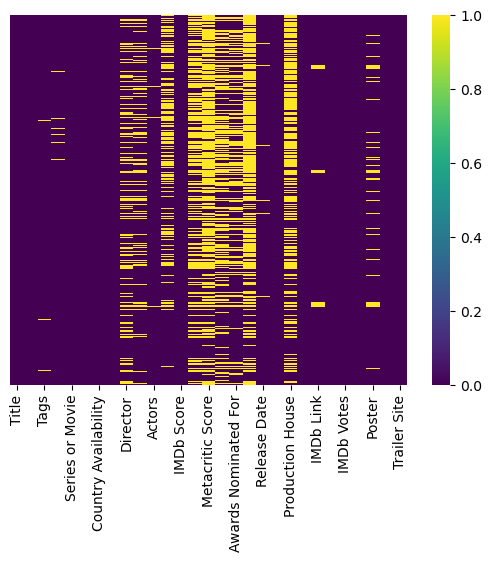

In [27]:
sns.heatmap(x.isnull(),yticklabels=False,cmap="viridis")

In [30]:
x.drop(['Title','Genre','IMDb Score','Trailer Site','Runtime','Image','IMDb Link'],axis=1,inplace=True)

In [31]:
x

,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,Rotten Tomatoes Score,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,IMDb Votes,Poster,TMDb Trailer
0,"Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,98.0,...,57.0,2122065.0,2008-12-12,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,205926.0,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM
1,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,79.0,...,NaN,70632.0,2020-05-08,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",2838.0,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ
2,"Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,NaN,...,NaN,NaN,2020-12-03,2021-03-03,NaN,https://www.netflix.com/watch/81306155,After her ex-boyfriend cons her out of a large...,131.0,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y
3,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,NaN,...,4.0,NaN,2011-06-14,2021-03-03,NaN,https://www.netflix.com/watch/81307527,A group of social welfare workers led by their...,47.0,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0
4,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,NaN,...,1.0,NaN,1949-10-31,2021-03-03,NaN,https://www.netflix.com/watch/81382068,An unhappily married farm worker struggling to...,88.0,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9420,"Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese",Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",Gary Winick,"Josh Goldsmith, Cathy Yuspa","Andy Serkis, Jennifer Garner, Mark Ruffalo, Ju...",PG-13,65.0,...,11.0,57231747.0,2004-04-23,2015-04-14,"Revolution Studios, Thirteen Productions LLC",https://www.netflix.com/watch/60034573,When a geeky teens birthday party goes awry an...,167842.0,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=SApIKVq1iJQ
9421,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",Jason Spingarn-Koff,NaN,Teasa Copprue,Not Rated,89.0,...,NaN,NaN,2010-01-22,2015-04-14,NaN,https://www.netflix.com/watch/70129457,Computer users across the globe log onto the v...,878.0,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=2TY-O5Dc8oA
9422,"Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,Amos Gitai,NaN,"Ryuichi Sakamoto, Clem Burke, Annie Lennox, Pa...",NaN,NaN,...,NaN,NaN,1988-09-17,2015-04-14,NaN,https://www.netflix.com/watch/70125340,In an idyllic port town on Australias west coa...,14.0,NaN,https://www.youtube.com/watch?v=RnGRdaX594k
9423,"Stand-up Comedy,International Movies,Comedies",Dutch,Movie,8.8,Belgium,Doesjka van Hoogdalem,Daniël Arends,Daniël Arends,NaN,NaN,...,NaN,NaN,2012-01-13,2015-04-14,NaN,https://www.netflix.com/watch/70281233,"In his third show, Daniël Arends a

<Axes: >

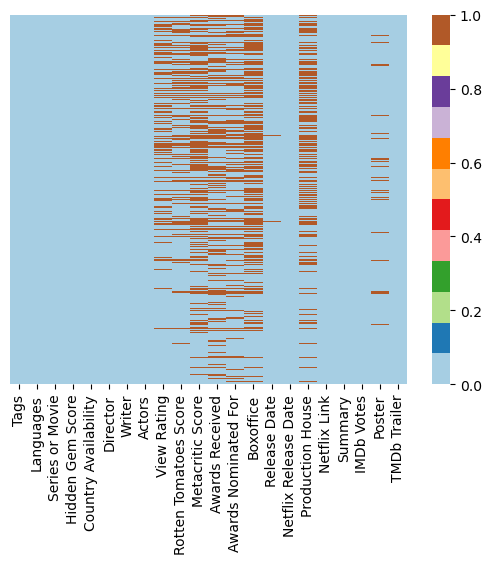

In [43]:
sns.heatmap(x.isnull(),yticklabels=False,cmap="Paired")

In [42]:
x.dropna(subset=['Director'],inplace=True)     #subset is a part of variable
x.dropna(subset=['Writer'],inplace=True)
x.dropna(subset=['Languages'],inplace=True)    #ye queries run nhi kiya kuki mene phale he sab cheez ko drop kar diya hai 
x.dropna(subset=['Actors'],inplace=True)
x.dropna(subset=['Genre'],inplace=True)
x.dropna(subset=['country Availability'],inplace=True)

KeyError: ['Genre']

In [48]:
x['Hidden Gem Score'].ffill(axis=0,inplace=True)
x['IMDb Votes']=x['IMDb Votes'].fillna(x['IMDb Votes'].mode()[0])

In [49]:
x.isna().sum()   #sum() it will collect all the data 

Tags                       26
Languages                   0
Series or Movie             0
Hidden Gem Score            0
Country Availability        9
Director                    0
Writer                      0
Actors                      0
View Rating              1442
Rotten Tomatoes Score    1427
Metacritic Score         2730
Awards Received          2533
Awards Nominated For     1681
Boxoffice                3005
Release Date               59
Netflix Release Date        0
Production House         2407
Netflix Link                0
Summary                     4
IMDb Votes                  0
Poster                    408
TMDb Trailer                0
dtype: int64

In [50]:
x['Rotten Tomatoes Score'].fillna(x['Rotten Tomatoes Score'].mean(), inplace=True)

In [52]:
x['Awards Received']=x['Awards Received'].fillna(0)

In [54]:
x['Awards Nominated For']=x['Awards Nominated For'].replace(np.nan,0)   #(np.nan,0)it replace the value into 0 those who are not naminated in the list 

In [55]:
x.isna().sum()

Tags                       26
Languages                   0
Series or Movie             0
Hidden Gem Score            0
Country Availability        9
Director                    0
Writer                      0
Actors                      0
View Rating              1442
Rotten Tomatoes Score       0
Metacritic Score         2730
Awards Received             0
Awards Nominated For        0
Boxoffice                3005
Release Date               59
Netflix Release Date        0
Production House         2407
Netflix Link                0
Summary                     4
IMDb Votes                  0
Poster                    408
TMDb Trailer                0
dtype: int64